In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cd /content/drive/My Drive/Data Analyst/Spiderum/data

/content/drive/My Drive/Data Analyst/Spiderum/data


In [ ]:
spiderum = pd.read_csv('./cleaned_data.csv')
spiderum.drop(columns=['Unnamed: 0'], inplace=True)
spiderum.head()

,Title,Author,Category,Upvote,View,Comment,Reading_time,Posting_time,Len_content,Len_comment,Reading_comment_time
0,Hướng dẫn tự học cờ vua,manhphuc2107,Kỹ năng,3,0,1,3,2021-02-10,4396,76,1
1,Tâm sự 2 ngày trước Tết...,loveable_boy,Chuyện trò - Tâm sự,2,0,0,3,2021-02-09,3088,0,1
2,[Cell Biology] Lịch sử phát triển học thuyết m...,The Bard,Science2vn,5,541,1,16,2021-02-09,16322,24,1
3,CÂU CHUYỆN NHUỘM TÓC CÁC MÀU VÀ CÁI NHÌN CỦA P...,Dân_chơi_4.0,Chuyện trò - Tâm sự,1,0,0,1,2021-02-09,1374,0,1
4,"Review sách ""Có 2 con mèo ngồi bên cửa sổ"". Cu...",Thao.nguyen.18719,Sách,1,0,0,3,2021-02-09,3516,0,1


In [ ]:
!pip3 install vncorenlp
!mkdir -p vncorenlp/models/wordsegmenter
!wget -q --show-progress https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget -q --show-progress https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget -q --show-progress https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/ 
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  44.0MB/s    in 0.6s    
vi-vocab            100%[===================>] 514.20K  --.-KB/s    in 0.06s   
wordsegmenter.rdr   100%[===================>] 125.50K  --.-KB/s    in 0.03s   


In [ ]:
# Lowercase and remove punctuation
import string
spiderum['Title'] = spiderum['Title'].str.lower()

for punc in string.punctuation:
    spiderum['Title'] = spiderum['Title'].apply(lambda x: x.replace(punc, ' '))

In [ ]:
from vncorenlp import VnCoreNLP
tokenizer = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

In [ ]:
text = {element: [] for element in spiderum['Category'].unique()}
text

{'Chuyện trò - Tâm sự': [],
 'Comics': [],
 'Du lịch - Ẩm thực': [],
 'English Zone': [],
 'Game': [],
 'Khoa học - Công nghệ': [],
 'Kỹ năng': [],
 'Otakulture': [],
 'Phim': [],
 'Quan điểm - Tranh luận': [],
 'Science2vn': [],
 'Sách': [],
 'Sáng tác': [],
 'Sự kiện Spiderum': [],
 'TED Talks': [],
 'Thế giới thú cưng': [],
 'Thể thao': [],
 'Tin tức': [],
 'Truyền cảm hứng': [],
 'Âm nhạc': []}

In [ ]:
# Tokenize reviews
for i in range(len(spiderum)):
    try:
        text[spiderum.loc[i, 'Category']] += tokenizer.tokenize(spiderum.loc[i, 'Title'])[0]
    except:
        pass

In [ ]:
total_text = []
for value in text.values():
    total_text += value

In [ ]:
stopword_vn = list(pd.read_csv('https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt', header=None)[0])
stopword_eng = list(pd.read_csv("https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords", header=None)[0])
stopword_vn = [w.replace(' ', '_') for w in stopword_vn]
stopwords = stopword_eng + stopword_vn
stopwords.append('ta')
remove_list = ['đặc_biệt', 'đến_cùng', 'đầu_tiên', 'đánh_giá', 'thật_thà', 'vở', 'tin', 'chung_cuộc', 'vượt', 'nhìn_nhận', 
               'nghe', 'đáng', 'bỏ_cuộc', 'sắp_đặt', 'nhanh', 'mức', 'nặng', 'tìm_hiểu', 'tốt', 'thái_quá', 'nhận_biết', 'giá_trị', 'gặp', 'quá_trình', 
               'nhận', 'cật_lực', 'thời_gian', 'lời_nói', 'ăn', 'trả', 'nghĩ_lại', 'quan_trọng', 'cảm_thấy', 'vị_trí', 'bất_tử', 'tình_trạng', 'thích', 
               'thay_đổi', 'tính_cách', 'ngọt', 'lên_ngôi', 'dữ', 'cơ_hội', 'sử_dụng', 'khoảng_cách', 'lý_do', 'trở_thành', 'tập_trung', 'xử_lý', 'chơi', 
               'bất_ngờ', 'tránh', 'lớn', 'chia_sẻ', 'vấn_đề', 'cao_sang', 'cuốn', 'khó', 'phù_hợp', 'lên_cơn', 'liên_quan', 'tìm', 'mở', 'tự_tạo', 
               'bản_thân', 'như_ý', 'bỏ', 'xuất_hiện', 'cảm_ơn', 'quan_tâm', 'xa_cách', 'khó_khăn', 'cha', 'hỗ_trợ', 'khác_thường', 'thấp', 'sớm',
               'nhớ', 'khách', 'chọn', 'xem_lại', 'xa', 'lâu', 'chuẩn_bị', 'thực_hiện', 'bán', 'giảm', 'thiếu', 'hiểu', 'khẳng_định', 'tăng', 'đạt']
for word in remove_list:
    stopwords.remove(word)

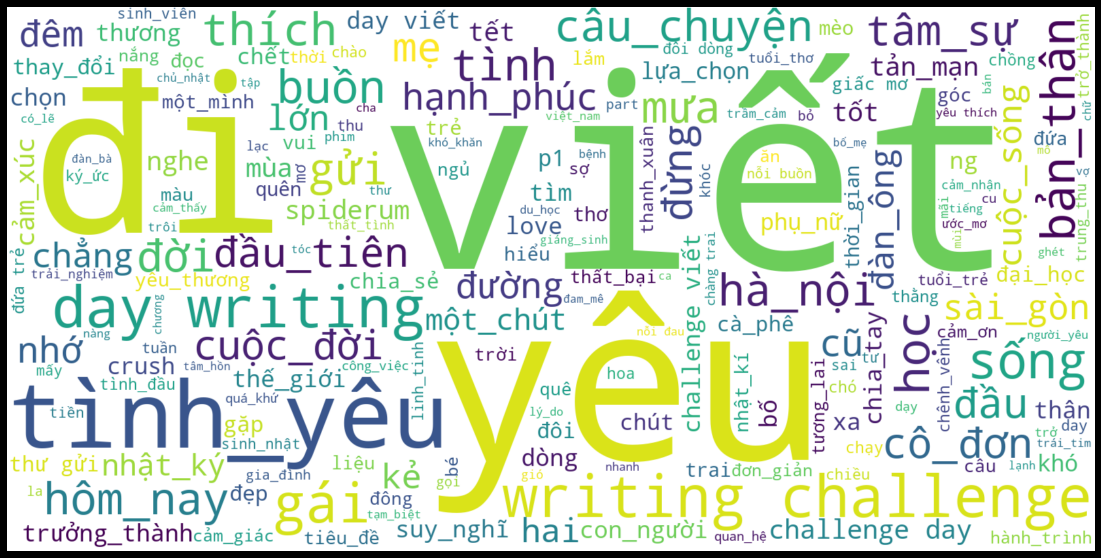

In [ ]:
# Build wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", stopwords=stopwords, width=1600, height=800).generate(' '.join(text['Chuyện trò - Tâm sự']))

plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

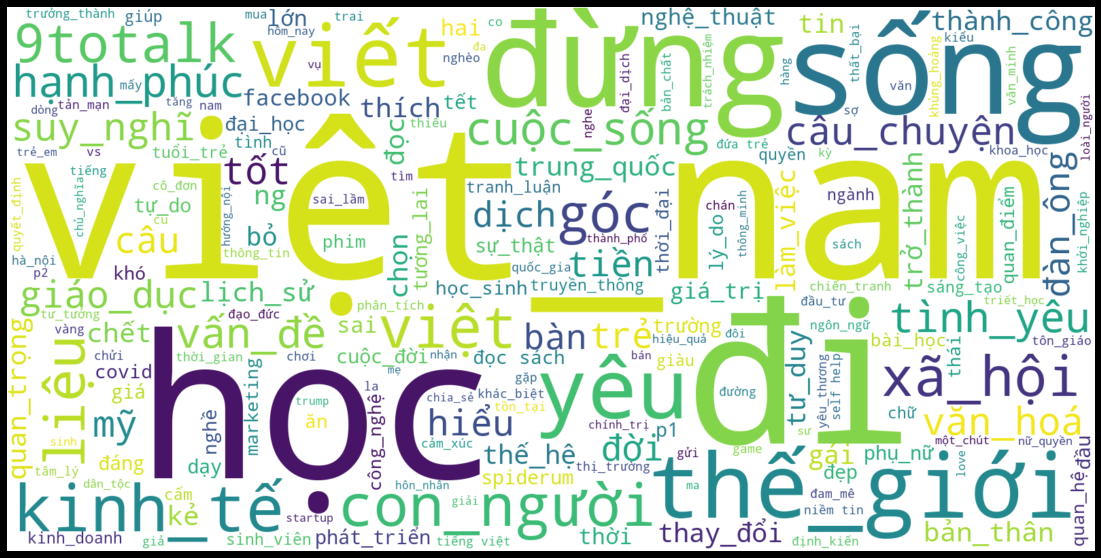

In [ ]:
# Build wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", stopwords=stopwords, width=1600, height=800).generate(' '.join(text['Quan điểm - Tranh luận']))

plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

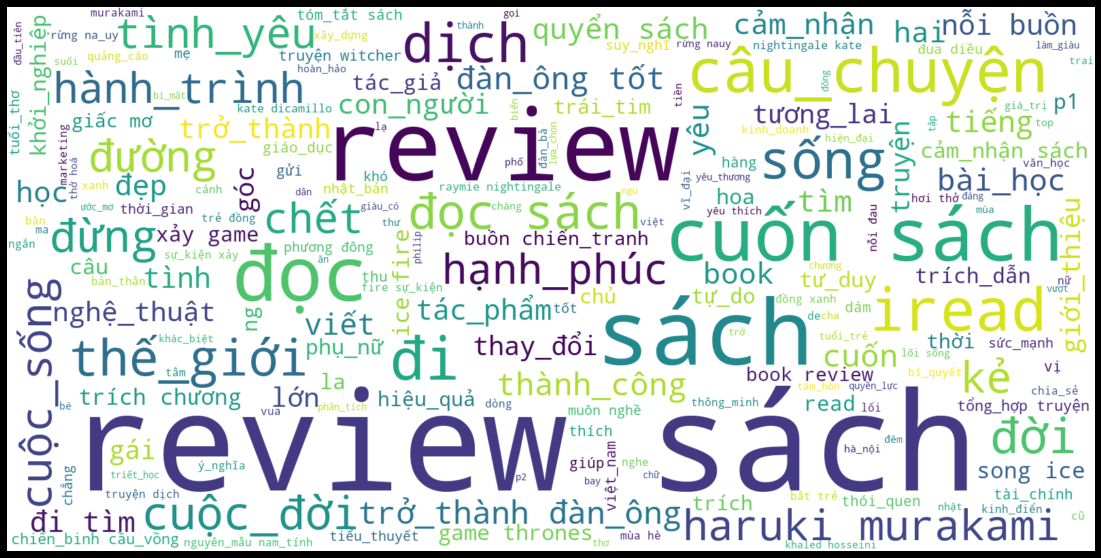

In [ ]:
# Build wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", stopwords=stopwords, width=1600, height=800).generate(' '.join(text['Sách']))

plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()